In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import random

In [7]:
# Define the data directory
data_dir = 'C:/Users/ADMIN/Desktop/chest_xray'
categories = ['NORMAL', 'PNEUMONIA']

# Initialize an empty dataframe for number of images with their directory category
data_counts = []

# Loop through each subfolder
for phase in ['train', 'test']:
    for category in categories:
        folder_path = os.path.join(data_dir, phase, category)
        count = len(os.listdir(folder_path))
        data_counts.append({'Phase': phase, 'Category': category, 'Count': count})

# Convert to DataFrame
df_counts = pd.DataFrame(data_counts)
print(df_counts)

   Phase   Category  Count
0  train     NORMAL   1341
1  train  PNEUMONIA   3875
2   test     NORMAL    234
3   test  PNEUMONIA    390


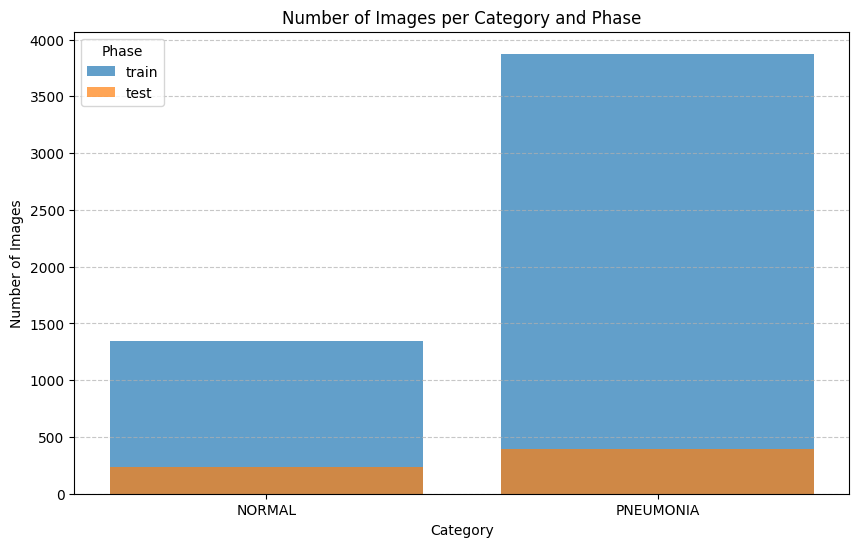

In [9]:
# Bar chart of image counts
plt.figure(figsize=(10, 6))
for phase in df_counts['Phase'].unique():
    subset = df_counts[df_counts['Phase'] == phase]
    plt.bar(subset['Category'], subset['Count'], alpha=0.7, label=phase)
    plt.title('Number of Images per Category and Phase')
    plt.xlabel('Category')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=0)
    plt.legend(title='Phase')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

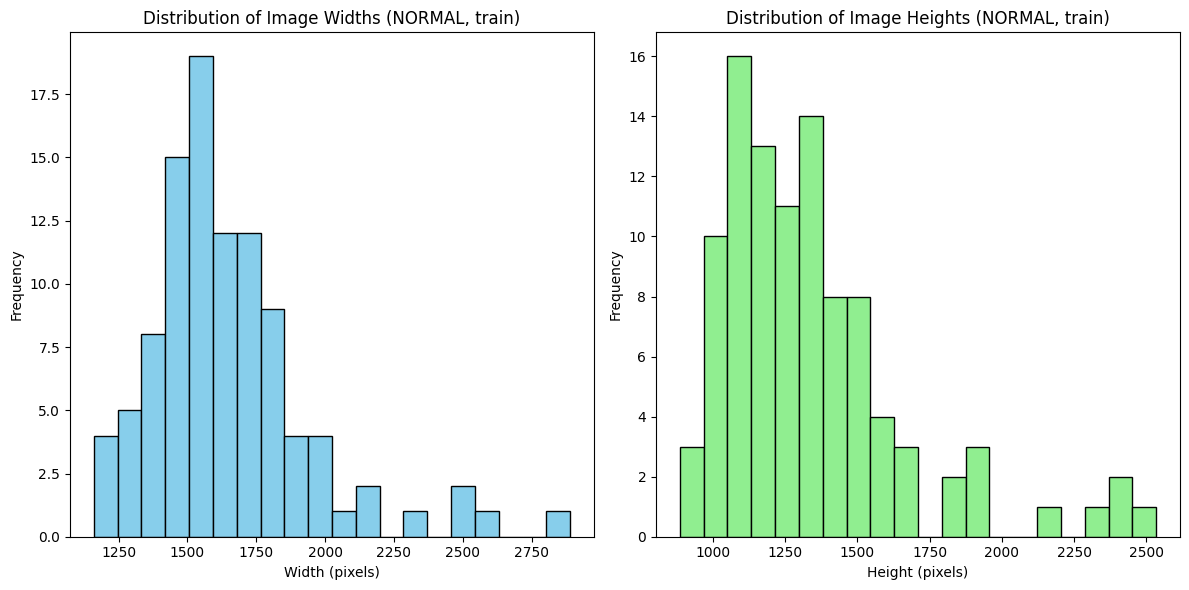

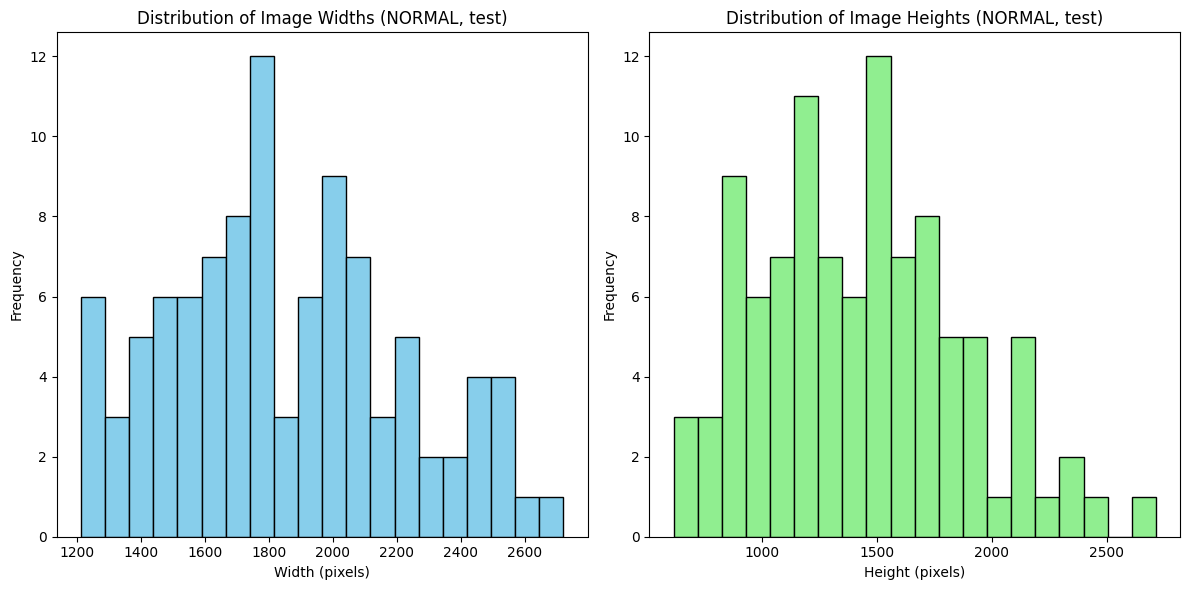

In [11]:
for phase in ['train', 'test']:
    # Load sample images and get their sizes for NORMAL in train phase
    normal_images = os.listdir(os.path.join(data_dir, phase, 'NORMAL'))
    sizes = []

    for img in random.sample(normal_images, 100):  # Sample 100 images
        img_path = os.path.join(data_dir, phase, 'NORMAL', img)
        with Image.open(img_path) as im:
            sizes.append(im.size)

    widths, heights = zip(*sizes)

    # Histogram of image widths and heights
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Image Widths (NORMAL, {phase})')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of Image Heights (NORMAL, {phase})')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    plt.tight_layout()
plt.show()

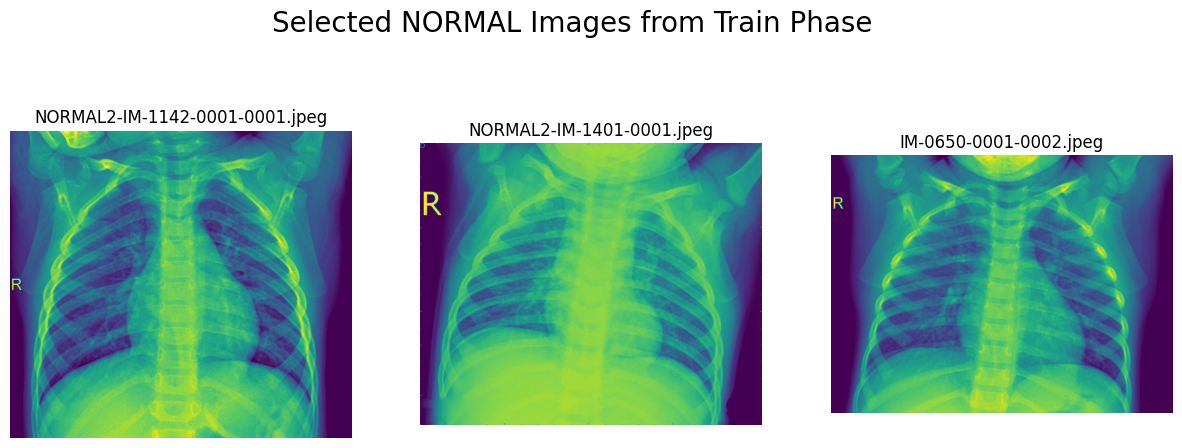

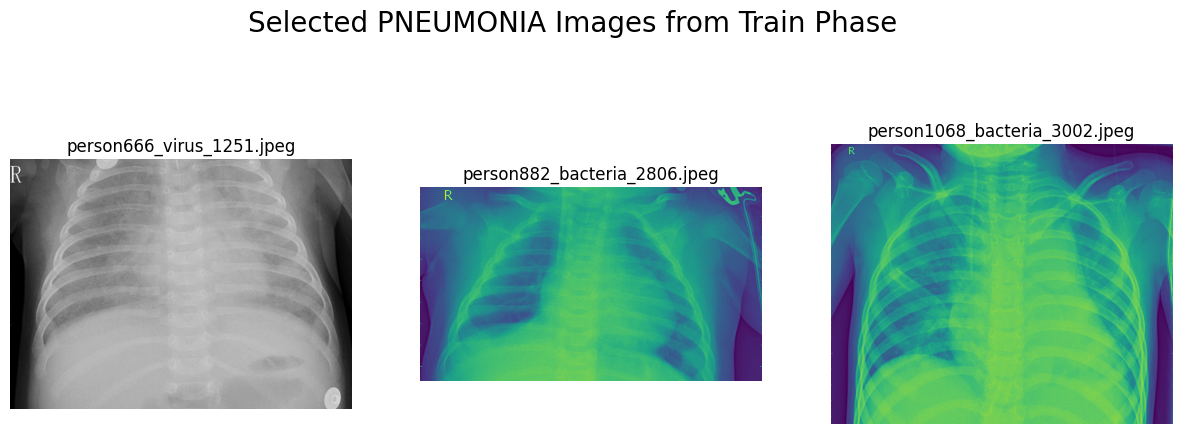

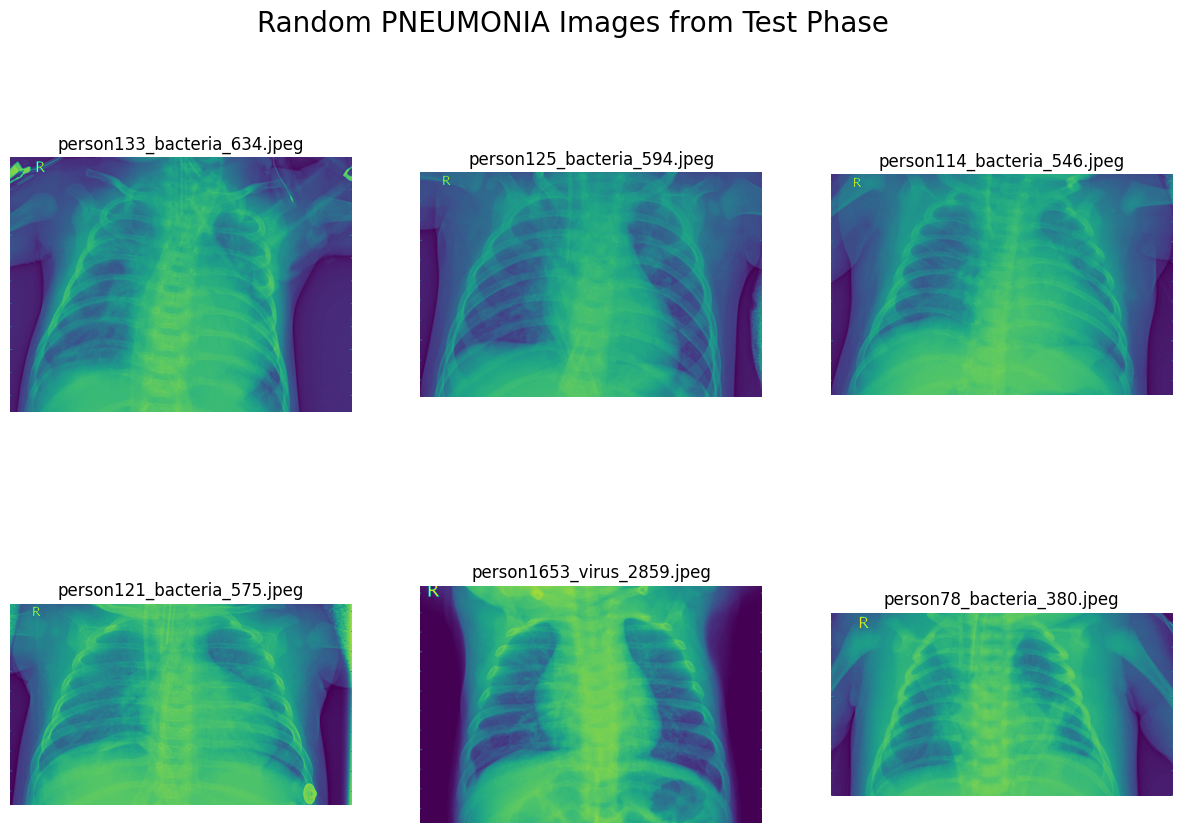

In [6]:
# Load sample images from the NORMAL category in the train phase
def load_images(phase, category, num_images=5):
    folder_path = os.path.join(data_dir, phase, category)
    images = os.listdir(folder_path)
    selected_images = random.sample(images, num_images)
    return [os.path.join(folder_path, img) for img in selected_images]

# Display images in a grid
def display_images(image_paths, title):
    plt.figure(figsize=(15, 10))
    plt.suptitle(title, fontsize=20)
    
    for i, img_path in enumerate(image_paths):
        plt.subplot(2, 3, i + 1)  # Adjust based on the number of images
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(img_path))
    
    plt.show()

# Load and display selected images from NORMAL category in the train phase
selected_images = load_images('train', 'NORMAL', num_images=3)
display_images(selected_images, 'Selected NORMAL Images from Train Phase')
selected_images = load_images('train', 'PNEUMONIA', num_images=3)
display_images(selected_images, 'Selected PNEUMONIA Images from Train Phase')

# Load and display random images from PNEUMONIA category in the test phase
random_pneumonia_images = load_images('test', 'PNEUMONIA', num_images=6)
display_images(random_pneumonia_images, 'Random PNEUMONIA Images from Test Phase')